Task A - The Tutorial "Python Statistics Fundamentals"

1. Missing values

In [1]:
import math
import numpy as np
x = [8, 1, 2.5, 4, 28]
x_with_nan = [8, 1, 2.5, math.nan, 4, 28]

math.nan and np.nan represent "not a number"

It makes no sense to calculate the mean of a list containing an element which is not a number

math.isnan is a function which returns True if the input is not a number and False otherwise

numpy.nan can't be computed since numpy is not defined, we have imported numpy as np

2. Weighted mean

In [2]:
import numpy as np
import pandas as pd
x = [8, 1, 2.5, 4, 28]
v = [0.1, 0.2, 0.3, 0.25, 0.15]
y, z, v = np.array(x), pd.Series(x), np.array(v)
vmean1 = np.average(y, weights=v)
vmean2 = sum(x_ * v_ for (x_, v_) in zip(x, v)) / sum(v)
vmean3 = sum(v * y)
print(vmean1, vmean2, vmean3)

6.95 6.95 6.95


x and v are two lists of numbers, which are converted into other classes

vmean1 calculates a ponderated average of the x values with the v weights

vmean2 does the same calculation as vmean1

vmean can also be calculated as the sum of an element-wise product betwen v and y



3. Median

In [3]:
import math
import statistics
import numpy as np
x_with_nan = [8, 1, 2.5, math.nan, 4, 28]
print(sorted(x_with_nan))
a = statistics.median(x_with_nan)
print(a)
b = np.median(x_with_nan)
print(b)
c = np.nanmedian(x_with_nan)
print(c)


[1, 2.5, 4, 8, nan, 28]
6.0
nan
4.0


a uses statistics.median which interprets nan as another number and computes the average of the two middle values of the sorted list (4 and 8) giving a final value of 6

b uses np.median which can't compute the median because of the nan

c uses np.nanmedian which omits the nan and takes the middle value of the sorted list, which is 4

4. Variance

In [4]:
import math
import statistics
import numpy as np
x_with_nan = [8, 1, 2.5, math.nan, 4, 28]
a = statistics.variance(x_with_nan)
print(a)
b = np.var(x_with_nan)
print(b)
c = np.nanvar(x_with_nan)
print(c)
d = np.nanvar(x_with_nan, ddof=1)
print(d)

x = [8, 1, 2.5, 4, 28]
n = len(x)
m = sum(x) / n
e = sum((item - m)**2 for item in x) / (n - 1)
print(e)
f = sum((item - m)**2 for item in x) / n
print(f)

nan
nan
98.55999999999999
123.19999999999999
123.19999999999999
98.55999999999999


a and b can't calculate the variance with nan

c and d omit the non. The divisor used in the calculation for the variance is N - ddof, c uses ddof = 0 and d uses ddof = 1 (meaning that there is a degree of freedom because of the omitted non)

5. Skewness



In [5]:
from scipy.stats import skew
import numpy as np 
import pylab as p 
x = [8.0, 1, 2.5, 4, 28.0]
print(skew(x))
print(skew(x, bias=False))

1.3061163034727836
1.9470432273905927


b) Skewness is the measure of how much the probability distribution of a random variable deviates from the normal distribution. The skewness is 0 when there is a normal distribution. If its negative, it means that the curve is skewed to the right. If its positive, it means that the curve is skewed to the left.

6. Percentiles and Quartils

In [6]:
import numpy as np
y = [-5, -1.1, 0.1, 2, 8, 12.8, 21, 25.8, 41]
print(sorted(y))
q1 = np.percentile(y, 25)
q2 = np.percentile(y, 50)
q3 = np.percentile(y, 75)
print(q1, q2, q3)
y_nan = [-5, -1.1, np.nan, 0.1, 2, 8, 12.8, 21, 25.8, 41]
print(sorted(y_nan))
q1_nan = np.nanpercentile(y_nan, 25)
q2_nan = np.nanpercentile(y_nan, 50)
q3_nan = np.nanpercentile(y_nan, 75)
print(q1_nan, q2_nan, q3_nan)


[-5, -1.1, 0.1, 2, 8, 12.8, 21, 25.8, 41]
0.1 8.0 21.0
[-5, -1.1, nan, 0.1, 2, 8, 12.8, 21, 25.8, 41]
0.1 8.0 21.0


7. Interquartile Range

In [7]:
y = [-5.0, -1.1, 0.1, 2.0, 8.0, 12.8, 21.0, 25.8, 41.0]
q75, q25 = np.percentile(y, [75 ,25])
iqr = q75 - q25
print(iqr)
print(np.std(y))

20.9
14.25956036238127


8. Covariance


[-10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7
   8   9  10]
[ 0  2  2  2  2  3  3  6  7  4  7  6  6  9  4  5  5 10 11 12 14]
[[38.5        19.95      ]
 [19.95       13.91428571]]
38.5
13.914285714285711


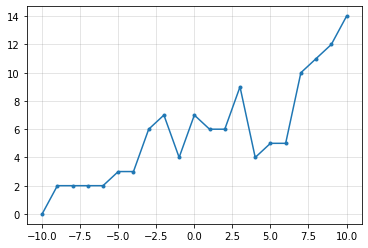

In [8]:
x = list(range(-10, 11))
y = [0, 2, 2, 2, 2, 3, 3, 6, 7, 4, 7, 6, 6, 9, 4, 5, 5, 10, 11, 12, 14]
np_x, np_y = np.array(x), np.array(y)
print(np_x)
print(np_y)
import matplotlib.pyplot as plt
plt.plot(x,y,'.-')
plt.grid(color='gray',alpha=0.25)
#part b - calculation of covariance matrix
print(np.cov(np_x, np_y))
#part d 
print(np_x.var(ddof=1))
print(np_y.var(ddof=1))

b) There is large positive covariance
d) We obtained the same values

9. Pearson correlation coefficient

In [9]:

import numpy as np
cov_xy = 19.95
sigma_x = np.sqrt(38.5)
sigma_y = np.sqrt(13.91428571)
coef = cov_xy/(sigma_x*sigma_y)
print(coef)
print(np.corrcoef(x,y)-np.eye(2))

0.8619500057643497
[[ 0.00000000e+00  8.61950006e-01]
 [ 8.61950006e-01 -1.11022302e-16]]


10. Axis specific calculations

In [10]:
import numpy as np
np_X = np.array([[1, 1, 1],
[2, 3, 1],
[4, 9, 2],
[8, 27, 4],
[16, 1, 1]])
#b
print(np.mean(np_X, axis=0))
#c
print(np_X.mean(axis=0))
#d
print(np.mean(np_X, axis=1))

[6.2 8.2 1.8]
[6.2 8.2 1.8]
[ 1.  2.  5. 13.  6.]


11. DataFrames

In [11]:
import pandas as pd
import pandas as pd
#a
row_names = ['first', 'second', 'third', 'fourth', 'fifth']
col_names = ['A', 'B', 'C']
df = pd.DataFrame(np_X, index=row_names, columns=col_names)
print(df)
#b
print("part b")
print(df.mean(axis=0))
print(df.mean(axis=0))
#c
print("part c")
print(df['A'].mean())
print(df['A'].var())
#d
print("part d")
print(df.to_numpy())

         A   B  C
first    1   1  1
second   2   3  1
third    4   9  2
fourth   8  27  4
fifth   16   1  1
part b
A    6.2
B    8.2
C    1.8
dtype: float64
A    6.2
B    8.2
C    1.8
dtype: float64
part c
6.2
37.20000000000001
part d
[[ 1  1  1]
 [ 2  3  1]
 [ 4  9  2]
 [ 8 27  4]
 [16  1  1]]


12. Box plots

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


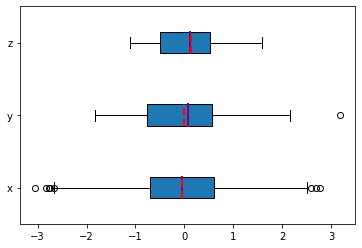

In [12]:
import numpy as np
np.random.seed(seed=0)
x = np.random.randn(1000)
y = np.random.randn(100)
z = np.random.randn(10)

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.boxplot((x, y, z), vert=False, showmeans=True, meanline=True,
labels=('x', 'y', 'z'), patch_artist=True,
medianprops={'linewidth': 2, 'color': 'purple'},
meanprops={'linewidth': 2, 'color': 'red'})
plt.show()

13. Histograms

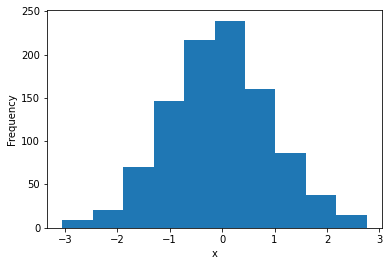

In [13]:
import numpy as np
import matplotlib.pyplot as plt
#hist contains the frequency or the number of items corresponding to each bin.
#bin_edges contains the edges or bounds of the bin.
hist, bin_edges = np.histogram(x, bins=10)
#b
fig, ax = plt.subplots()
ax.hist(x, bin_edges, cumulative=False) # The third argument disables the option to create
# a histogram with cumulative values.
ax.set_xlabel('x')
ax.set_ylabel('Frequency')
plt.show()

14. Pie Charts

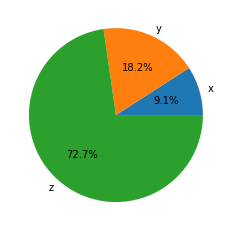

In [14]:
import matplotlib.pyplot as plt
x, y, z = 128, 256, 1024
fig, ax = plt.subplots()
ax.pie((x, y, z), labels=('x', 'y', 'z'), autopct='%1.1f%%')
plt.show()

15. Bar Charts

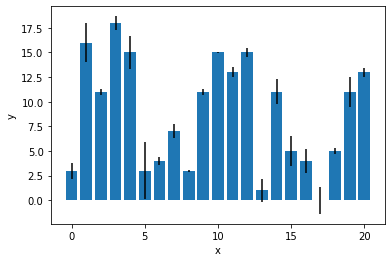

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
[ 3 16 11 18 15  3  4  7  3 11 15 13 15  1 11  5  4  0  5 11 13]
[-0.80656479  2.01621342 -0.30215182  0.67375184  1.66826442 -2.9163849
  0.43166367 -0.72905029  0.11509943  0.3143407   0.03632548  0.53540839
 -0.50008969  1.20285171 -1.25813641 -1.51082149 -1.23405636  1.38609134
 -0.29442511 -1.50657565 -0.46735128]


In [15]:
import numpy as np
x = np.arange(21) # array of consecutive integers from 0 to 20
y = np.random.randint(21, size=21)
err = np.random.randn(21) # err contains normally distributed floating-point numbers,
#which are simulated errors
fig, ax = plt.subplots()
ax.bar(x, y, yerr=err)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

print(x)
print(y)
print(err)

An array of x is created from 0 to 20. Then, another array of y is created that contains 21 numbers from 0 to 21. Then, a random normal distribution of 21 numbers are created which represent relative errors. Lastly, the values x and y and the +/- errors are represented in subplots.

16. X-Y Plots with Regression Lines

In [16]:
import scipy.stats
x = np.arange(21)
y = 5 + 2 * x + 2 * np.random.randn(21)
results = scipy.stats.linregress(x, y)
print(results)

LinregressResult(slope=2.020671244485858, intercept=5.487603029295524, rvalue=0.9929033331762097, pvalue=4.895358081841591e-19, stderr=0.055524188128186935)


An array of x is created from 0 to 20. Then, y array is created using the values that are obtained from array x. Lastly, linear regression results are calculated using x and y.

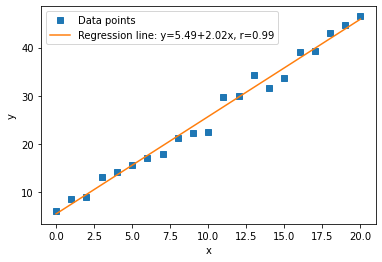

In [17]:
line = f'Regression line: y={results.intercept:.2f}+{results.slope:.2f}x, r={results.rvalue:.2f}'
fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker='s', label='Data points')
ax.plot(x, results.intercept + results.slope * x, label=line)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(facecolor='white')
plt.show()

A regression line is created. The data points are obtained from x and y are represented in the plot.

17. Heatmaps

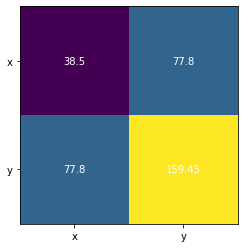

[[ 38.5   77.8 ]
 [ 77.8  159.45]]


In [18]:
matrix = np.cov(x, y).round(decimals=2)
fig, ax = plt.subplots()
ax.imshow(matrix)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('x', 'y'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('x', 'y'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
  for j in range(2):
    ax.text(j, i, matrix[i, j], ha='center', va='center', color='w')
plt.show()

#part b
print(matrix)

Task B - Kernel Density Estimates instead of histograms

Exercise 1

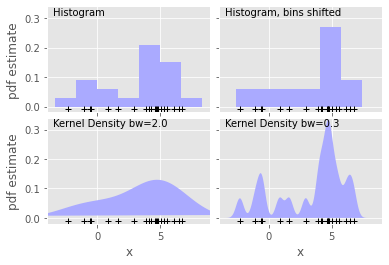

In [19]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
# sets the style for plots by choosing colors, line widths, and other stylistic elements:
plt.style.use('ggplot')

#Generate 20 data to have something to look at, use a fixed seed for the random number generator
#to produce the same results in every run
np.random.seed(1)
N = 20
X = np.concatenate(
(np.random.normal(0, 1, int(0.3 * N)), np.random.normal(5, 1, int(0.7 * N)))
)[:, np.newaxis]
X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]
bins = np.linspace(-5, 10, 10)

#Prepare a figure with a 2x2 subplot configuration
fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.05, wspace=0.05)

#Set a parameter to make the histograms produced normalized
density_param = {"density": True}

# histogram upper left
ax[0, 0].hist(X[:, 0], bins=bins, fc="#AAAAFF", **density_param)
ax[0, 0].text(-3.5, 0.31, "Histogram")

# histogram upper right
ax[0, 1].hist(X[:, 0], bins=bins + 0.75, fc="#AAAAFF", **density_param)

ax[0, 1].text(-3.5, 0.31, "Histogram, bins shifted")

# Gaussian KDE lower left
kde = KernelDensity(kernel="gaussian", bandwidth=2.0).fit(X)
log_dens = kde.score_samples(X_plot)
ax[1, 0].fill(X_plot[:, 0], np.exp(log_dens), fc="#AAAAFF")
ax[1, 0].text(-3.5, 0.31, "Kernel Density bw=2.0")

# Gaussian KDE lower right
kde = KernelDensity(kernel="gaussian", bandwidth=0.3).fit(X)
log_dens = kde.score_samples(X_plot)
ax[1, 1].fill(X_plot[:, 0], np.exp(log_dens), fc="#AAAAFF")
ax[1, 1].text(-3.5, 0.31, "Kernel Density bw=0.3")

#Add decorations: At the bottom of each subplot the datapoints generated are shown as black crosses.
for axi in ax.ravel():
  axi.plot(X[:, 0], np.full(X.shape[0], -0.01), "+k")
  axi.set_xlim(-4, 9)
  axi.set_ylim(-0.02, 0.34)

for axi in ax[:, 0]:
  axi.set_ylabel("pdf estimate")

for axi in ax[1, :]:
  axi.set_xlabel("x")

a) The difference between the top left and the top right histograms is the size of the bins.

b) The top left histogram is a better representation of the real probability density functions rather than the top right histogram. The bins in the top right histogram are too wide, therefore, the histogram is missing important information.

c) The bandwidth value 2 used in the lower left subplot is too large because the Kernell estimate is missing important details of the real probability density function.

d) The bandwidth value 0,3 used in the lower right subplot is too small because the Kernell estimate is very rough, it is overfitting the data, representing the noise.

e) The KDE always has area 1 because it is estimating a probability density function which is the sum of all possibilities. The integral of a pdf is 1.

Exercise 2

Optimal bandwidth: 1.3


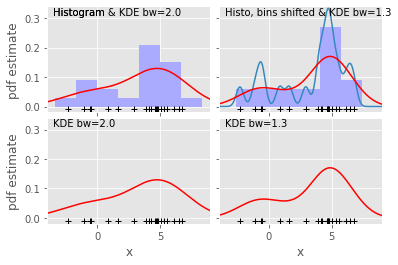

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV
# sets the style for plots by choosing colors, line widths, and other stylistic elements:
plt.style.use('ggplot')

#The grid to search through in order to find the most promising (optimal) bandwidth
bandwidth = np.arange(0.05, 2, .05)

kde = KernelDensity(kernel='gaussian')

#Default: Finds the maximum likelihood estimate using 5-fold CV:
grid = GridSearchCV(kde, {'bandwidth': bandwidth})
grid.fit(X)
optimal_kde = grid.best_estimator_
optimal_bandwidth=optimal_kde.bandwidth
print("Optimal bandwidth:",optimal_bandwidth)

#Prepare a figure with a 2x2 subplot configuration
fig1, ax1 = plt.subplots(2, 2, sharex=True, sharey=True)
fig1.subplots_adjust(hspace=0.05, wspace=0.05)

# histogram upper left
density_param = {"density": True}
ax1[0, 0].hist(X[:, 0], bins=bins, fc="#AAAAFF", **density_param)
ax1[0, 0].text(-3.5, 0.31, "Histogram")

# histogram upper right
ax1[0, 1].hist(X[:, 0], bins=bins + 0.75, fc="#AAAAFF", **density_param)
ax1[0, 1].text(-3.5, 0.31, " ")
ax1[0, 1].plot(X_plot[:, 0], np.exp(log_dens))

# Gaussian KDE lower left
kde = KernelDensity(kernel="gaussian", bandwidth=2.0).fit(X)
log_dens = kde.score_samples(X_plot)
#ax1[1, 0].fill(X_plot[:, 0], np.exp(log_dens), fc="#AAAAFF")
ax1[1, 0].plot(X_plot[:, 0], np.exp(log_dens),color="red")
ax1[1, 0].text(-3.5, 0.31, "KDE bw=2.0")
ax1[0, 0].plot(X_plot[:, 0], np.exp(log_dens),color="red")
ax1[0, 0].text(-3.5, 0.31, "Histogram & KDE bw=2.0")

# Gaussian KDE lower right
kde = KernelDensity(kernel="gaussian", bandwidth=1.3).fit(X)
log_dens = kde.score_samples(X_plot)
#ax1[1, 1].fill(X_plot[:, 0], np.exp(log_dens), fc="#AAAAFF")
ax1[1, 1].plot(X_plot[:, 0], np.exp(log_dens),color="red")
ax1[1, 1].text(-3.5, 0.31, "KDE bw=1.3")
ax1[0, 1].plot(X_plot[:, 0], np.exp(log_dens),color="red")
ax1[0, 1].text(-3.5, 0.31, "Histo, bins shifted & KDE bw=1.3")

for axi in ax1.ravel():
 axi.plot(X[:, 0], np.full(X.shape[0], -0.01), "+k")
 axi.set_xlim(-4, 9)
 axi.set_ylim(-0.02, 0.34)

for axi in ax1[:, 0]:
 axi.set_ylabel("pdf estimate")

for axi in ax1[1, :]:
 axi.set_xlabel("x")

a) There is a range of values of b (from 0,05 to 1,95 with a step of 0,05) which are evaluted for 5 different subsets of data. Finally, it is chosen as the optimal bandwidth the value which has a better average performance in the 5 subsets (maxiumum likelihood).

b) b=1,3 looks better than b=2 because b=2 is missing important details. b=1,3 is looks better than b=0,3 because is b=0,3 is representing irrelevant details. b=1,3 represent a deep around x=2 which b=2 doesn't. b=0,3 represents a lot of spikes which are noise.

Exercise 3

In [21]:
#Generate three datasets of different size from N(0,1)
#and put them into a DataFrame callled df, in order to p
#repare for visualization using plotly below
import numpy as np
import pandas as pd
x = np.random.randn(1000)
y = np.random.randn(100)
z = np.random.randn(10)
df_A = pd.DataFrame(x, columns = ['A'])
df_B = pd.DataFrame(y, columns = ['B'])
df_C = pd.DataFrame(z, columns = ['C'])
df=pd.concat([df_A,df_B,df_C],axis=1)


#Use plotly to summarize the three datasets as boxplots
import plotly.graph_objects as go
import numpy as np
fig = go.Figure()
# Use x instead of y argument if you want horizontal plot
fig.add_trace(go.Box(y=x,name='Sample A',marker_color = 'indianred'))
fig.add_trace(go.Box(y=y,name='Sample B',marker_color = 'lightseagreen'))
fig.add_trace(go.Box(y=z,name='Sample C',marker_color = 'blue'))
fig.show()

#Use plotly to summarize the resulting three datasets as boxplots
import plotly.graph_objects as go
import numpy as np
fig = go.Figure()
# Use x instead of y argument if you want horizontal plot
fig.add_trace(go.Violin(y=x,name='Sample A',marker_color = 'indianred'))
fig.add_trace(go.Violin(y=y,name='Sample B',marker_color = 'lightseagreen'))
fig.add_trace(go.Violin(y=z,name='Sample C',marker_color = 'blue'))
fig.show()

a) Datasets A, B and C consist of 1000, 100 and 10 values respectively, generated from a normal distribution of mean 0 and variance 1.

b) Q3_A = 0,675 < Q3_B = 0,678

c) If the code is executed a second time the boxplots change. This is the datasets are generated randomly, so in each execution new datasets will be obtained.

d) KDE_A(y=2) = 0,174

e) Violin plots are a better option than boxplots when the data is coming from a multi-modal distribution, since the different peaks would be represented.

Task C - Build your own kernel density estimator in Python

In [22]:
def my_kde(x, b, list_of_samples):
  sum = 0
  for xn in list_of_samples:
    sum += (1/(b*math.sqrt(2*math.pi)))*math.exp((-1/(2*b**2))*(x-xn)**2)
  return sum/len(list_of_samples)

In [23]:
def b_from_my_kde(x, list_of_samples, bandwith):
  xmax = max(x)
  xmin = min(x)
  N = len(list_of_samples)
  Lx = xmax - xmin
  J = int(1e4)
  deltax = 3*Lx/J
  L_list = []
  for b in bandwith:
    term1 = 0
    for j in range(J):
      xi = xmin - Lx + deltax*j
      term1_2 = 0
      for xn in list_of_samples:
        term1_2 += (1/(b*math.sqrt(2*math.pi)))*math.exp((-1/2)*((xi-xn)/b)**2)
      term1 += (term1_2/N)**2
    term2 = 0
    n = 0
    for xn in list_of_samples:
      list_of_samples_without_xn = np.delete(list_of_samples, n)
      term2 += my_kde(xn, b, list_of_samples_without_xn)
      n += 1
    L = deltax*term1 - (2/N)*term2
    L_list.append(L)
  min_L = min(L_list)
  min_index = L_list.index(min_L)
  return bandwith[min_index]

In [24]:
#np.random.seed(1)
#N = 20
#X = np.concatenate((np.random.normal(0, 1, int(0.3 * N)), np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]
#X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]
#bandwidth = np.arange(0.05, 2, .05)
b = b_from_my_kde(X_plot, X, bandwidth)
print(f"Optimal bandwith: {b}")

Optimal bandwith: 1.05


The optimal bandwith is close to 1,3 but not equal.

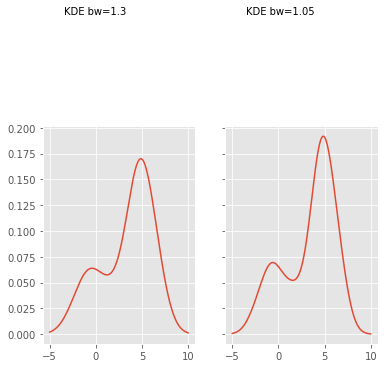

In [25]:
import matplotlib.pyplot as plt
Y1 = []
Y2 = []
for x in X_plot:
  Y1.append(my_kde(x, 1.3, X))
  Y2.append(my_kde(x, b, X))
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True)
ax[0].plot(X_plot, Y1)
ax[0].text(-3.5, 0.31, "KDE bw=1.3")
ax[1].plot(X_plot, Y2)
ax[1].text(-3.5, 0.31, "KDE bw="+str(b))
fig.show()